#WHY DO WE CARE SO MUCH ABOUT NORAMLITY ?

---

Most of the paramteric machine learning models like LDA, Linear Regression and amy more assume that the data is normally distributed. If this assumption fails the model fails to give accurate predictions.

# WHAT IS NORMAL DISTRIBUTION ?

A probability distribution with the mean 0 and standard deviation of 1 is known as standard normal distribution or Gaussian distribution. A normal distibution is **symmetric** about the mean and follows a **bell shaped curve** . And almost 99.7% of the values lies within 3 standard deviation. The mean, median and mode of a normal distribution are equal.

---



# SKEWNESS

## What is skewness?

Skewness of a distribution is defined as the lack of symmetry. In a symmetrical distribution, the Mean, Meadian and Mode are equal.The normal distribution has a skewness of 0.


Skewness tell us about distribution of our data.


<a href="https://imgur.com/6SH4wau.png"><img src="https://imgur.com/6SH4wau.png" title="source: imgur.com" /></a>

##Skewness is of two types:

* **Positive skewness:** When the tail on the right side of the distribution is longer or fatter, we say the data is positively skewed. For a positive skewness mean > median > mode.   

* **Negative skewness:** When the tail on the left side of the distribution is longer or fatter, we say that the distribution is negatively skewed. For a negative skewness mean < median < mode.
---

## What does skewness tells us?
To understand this better consider a example.

Consider house prices ranging from 100k to 1,000,000 with the average being 500,000. 

If the peak of the distribution is in left side that means our data is positively skewed and most of the houses are being sold at the price less than the average.  

If the peak of the distribution is in right side that means our data is negatively skewed and most of the houses are being sold at the price greater than the average.


Now, the question is when we can say our data is mderately skewed or heavily skewed?
  
  The thumb rule is:
  If the skewness is between -0.5 to +0.5 then we can say data is fairly symmetrical.
  If the skewness is between -1 to -0.5 or 0.5 to 1 then data is moderately skewed.
  And if the skewness is less than -1 and greater than +1 then our data is heavily skewed.


---



---



# KURTOSIS

You might have heard that kurtosis tells us about the shape or peakedness or flatness of the distribution but this is not correct. Kurtosis tell us about the tails behaviour. It is actually the measure of outliers present in the distribution. 

<a href="https://imgur.com/7FuwfAK.png"><img src="https://imgur.com/7FuwfAK.png" title="source: imgur.com" /></a>





##Kurtosis are of three types:

* **Mesokurtic:** When the tails of the distibution is similar to the normal distribution then it is mesokurtic. The kutosis for normal distibution is 3.

* **Leptokurtic:** If the kurtosis is greater than 3 then it is leptokurtic. In this case, the tails will be heaviour than the normal distribution which means lots of outliers are present in the data. It can be recognized as thin bell shaped distribution with peak higher than normal distribution.

* **Platykurtic:** Kurtosis will be less than 3 which implies thinner tail or lack of outliers than normal distribution.In case of platykurtic, bell shaped distribution will be broader and peak will be lower than the mesokurtic.


---



---



# Tranformations to reduce skewness or kurtosis



Let's take an example to handle the skewness and kutosis in a dataset. For this, I have used the 'House Pricing' data.

In [0]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from scipy.stats import skew, skewtest, norm
import scipy.stats as st
from scipy.stats import kurtosis
from scipy.stats import boxcox

##Read Data

In [0]:
#read data
df= pd.read_csv('/content/drive/My Drive/data_set/house_prices_k.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Check Description of SalePrice

In [0]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Here we can see that Mean (180921) is greater than the median(163000) and the maximum is 3.5 times the 75%. (The distribution is positvely skewed).
* We can say that most of the house prices are below the average.

### Let's plot and check distirbution

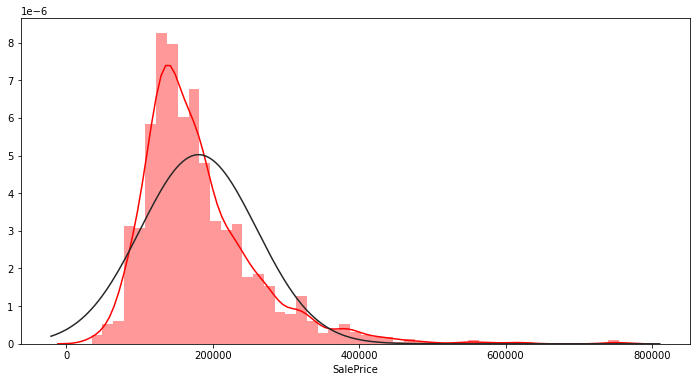

In [0]:
#Plot and check the distribution 
plt.figure(figsize=(12,6))
sns.distplot(df['SalePrice'],fit=norm, color ="r")
plt.show()

The histogram confirm that our dataset is positively skewed.

### Now let's check the measure of skewness and kurtosis

In [0]:
print("Skew of raw data: %f" % df['SalePrice'].skew()) #check skewness
print("Kurtosis of raw data: %f" % kurtosis(df['SalePrice'],fisher = False)) #check kurtosis

Skew of raw data: 1.882876
Kurtosis of raw data: 9.509812


Here, skew of raw data is positive and greater than 1,and kurtosis is greater than 3, right tail of the data is skewed. So, our data in this case is positively skewed and lyptokurtic.

Note- If we are keeping 'fisher=True', then kurtosis of normal distibution will be 0. Similarly, kurtosis >0 will be leptokurtic and kurtosis < 0 will be platykurtic

##Common transformation method to handle positively skewed data are
* square root transformation 
* Cube root transformation
* log transformations


###Let's look at the effect of all these transformation on our dataset.

### Square root transformation

One thing to insure before applying sqare root transformation is that all the values must be positive.

count    1460.000000
mean      416.617225
std        85.769006
min       186.815417
25%       360.520452
50%       403.732585
75%       462.601340
max       868.907360
Name: SalePrice, dtype: float64

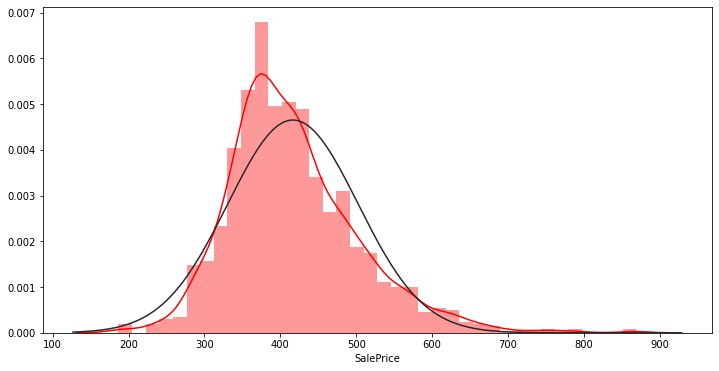

In [0]:
# Square root transformation
plt.figure(figsize=(12,6))
square_root = df['SalePrice']**(1/2)
sns.distplot(square_root,fit=norm, color ="r") #plot distplot
square_root.describe()

We can notice that the Mean(416.62) and Median(403.73) has been reduced and are close to each other. But the maximum value is twice of 75 percentile.

### Check the kurtosis and skewness

In [0]:
print("Skew after square root Transformation: %f" % square_root.skew())
print("Kurtosis after square root Transformation: %f" % kurtosis(square_root,fisher = False))

Skew after square root Transformation: 0.943153
Kurtosis after square root Transformation: 4.946999


The square root transformation has reduced the skewness and kutosis here but still the values on the right side are not normally distributed. Maximum value is twice of 75th percentile value.

### Cube Root Transformation

Skew after cube root Transformation: 0.666768
Kurtosis after cube root Transformation: 4.258971


count    1460.000000
mean       55.530542
std         7.515260
min        32.679480
25%        50.654722
50%        54.625556
75%        59.814240
max        91.057485
Name: SalePrice, dtype: float64

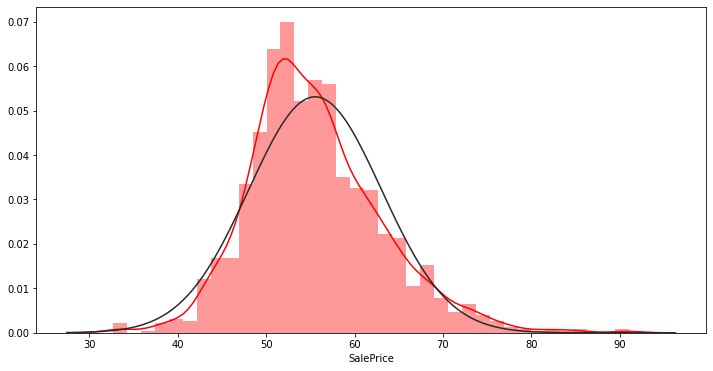

In [0]:
#cube root transformation
plt.figure(figsize=(12,6))
cube_root = df['SalePrice']**(1/3)
sns.distplot(cube_root, fit=norm,color ="r")
print("Skew after cube root Transformation: %f" % cube_root.skew())
print("Kurtosis after cube root Transformation: %f" % kurtosis(cube_root,fisher = False))
cube_root.describe()


Cube root transformation seems to have stronger impact than square root here. We can use cube root transformation with both positive and negative values and with negative skewed data also.

### Log Transformation

Skew after Log Transformation: 0.121347
Kurtosis after Log Transformation: 3.802643


count    1460.000000
mean       12.024057
std         0.399449
min        10.460271
25%        11.775105
50%        12.001512
75%        12.273736
max        13.534474
Name: SalePrice, dtype: float64

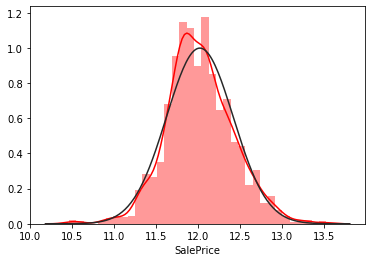

In [0]:
#log transformation
Log = np.log1p(df['SalePrice']) 
sns.distplot(Log, fit=norm,color ="r")
print("Skew after Log Transformation: %f" % Log.skew())
print("Kurtosis after Log Transformation: %f" % kurtosis(Log,fisher = False))
Log.describe()

Log transformation is most powerful with these kind of dataset. Now, the distribution seems more normaly distibuted.

### Log of log transformation

Skew after taking log of log Transformation: -0.009229
Kurtosis after Log Transformation: 3.879888


count    1460.000000
mean        2.566329
std         0.030660
min         2.438886
25%         2.547498
50%         2.565066
75%         2.585787
max         2.676523
Name: SalePrice, dtype: float64

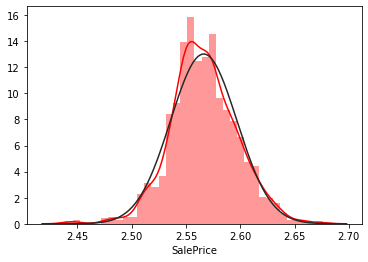

In [0]:
#Log of log transformation
log_of_log = np.log1p(Log)
sns.distplot(log_of_log, fit=norm,color ="r")
print("Skew after taking log of log Transformation: %f" % log_of_log.skew())
print("Kurtosis after Log Transformation: %f" % kurtosis(log_of_log,fisher = False))
log_of_log.describe()

Among all the transformation method mentioned above, log of log transformations is best with this data with the skew of -0.009 and kurtosis 3.87.

### Log max transformation

Skew after Log max Transformation: 0.243824
Kurtosis after Log max Transformation: 3.800638


count    1460.000000
mean        2.432301
std         0.071944
min         2.165950
25%         2.386930
50%         2.427195
75%         2.476508
max         2.718282
Name: SalePrice, dtype: float64

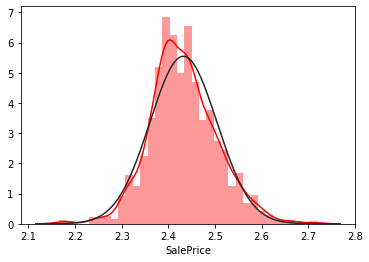

In [0]:
#Log max tranformation
log_max = np.log(df['SalePrice'].max())
log_max_root = df['SalePrice']**(1/log_max)
sns.distplot(log_max_root, fit=norm,color ="r")
print("Skew after Log max Transformation: %f" % log_max_root.skew())
print("Kurtosis after Log max Transformation: %f" % kurtosis(log_max_root,fisher = False))
log_max_root.describe()

We can also use Box-cox transformation with different lambda values. Box-cox transformation with the lambda value 0 is nothing but log transformation. Below is the list of different lanbda values we can consider while doing box-cox transformation.


Lambda= -2 --> Y'=1/Y2 

Lambda= -1 --> Y'=1/Y

Lambda= -0.5 --> Y'=1/SQRT(Y)

Lambda= 0 --> Y'=LOG(Y)

Lambda= 0.5 --> Y'=SQRT(Y)

Lambda= 1 --> Y'=Y

Lambda= 2 --> Y'=Y2

Box-cox transformation only works if all the data is positive and greater than 0. In case of negative data, we can add a constant value to make it positive before applying box-cox transformation.

## Box-cox transformation

Skew after box cox Transformation: 0.121210
kurt after box cox Transformation: 3.802656


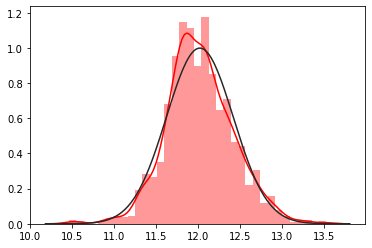

In [0]:
#Box-cox tranformation
Box_cox = st.boxcox(df['SalePrice'],lmbda=0)
sns.distplot(Box_cox,fit=norm, color ="r")
print("Skew after box cox Transformation: %f" % skew(Box_cox))
print("kurt after box cox Transformation: %f" % kurtosis(Box_cox,fisher = False))